## **⚛️ K-Nearest Neighbor (KNN) - Caso de entrenamiento**

#### **⭕️ Introducción** 

En el análisis de la satisfacción del usuario en aplicaciones móviles, comprender las opiniones de los usuarios es esencial para los desarrolladores y las empresas, ya que permite identificar aspectos clave de mejora y optimización. Las reseñas de los usuarios, que incluyen tanto texto como una puntuación en estrellas, ofrecen una perspectiva directa sobre su experiencia y sentimientos hacia la app. En este ejercicio, se han tomado 257 reseñas de usuarios, donde las estrellas otorgadas actúan como etiquetas discretas que varían de 1 a 5. Aunque una puntuación alta suele interpretarse como un sentimiento positivo, esto no siempre es el caso. A través del procesamiento de las reseñas, que incluyen variables como el título de la opinión, el texto, el conteo de palabras y el análisis de sentimiento, buscamos entender la relación entre la valoración numérica y el contenido de la opinión. Este enfoque puede proporcionar información valiosa para mejorar la experiencia del usuario y la calidad de la app.

#### **⭕️ Núcleo Problémico**

La satisfacción del usuario es un indicador clave en el éxito de cualquier aplicación móvil, y las reseñas de usuarios representan una fuente valiosa de retroalimentación directa. Sin embargo, interpretar y analizar de manera precisa estas opiniones supone un desafío, ya que las calificaciones en estrellas, si bien son una métrica cuantificable, no siempre reflejan de manera completa el sentimiento o la percepción real del usuario. Una puntuación alta no necesariamente implica una opinión completamente positiva, ni una puntuación baja implica siempre una percepción negativa, ya que el contexto textual puede revelar matices que las estrellas no capturan.

Este problema plantea la necesidad de una metodología que permita relacionar las evaluaciones numéricas con el contenido cualitativo expresado en las reseñas. Al contar con un conjunto de datos compuesto por el título de la reseña, el texto, el conteo de palabras, el análisis de sentimiento de ambas partes y la calificación en estrellas, se hace posible un análisis más detallado. El objetivo es explorar cómo el contenido textual y el sentimiento expresado en las palabras de los usuarios correlacionan con su puntuación en estrellas, proporcionando una visión más profunda sobre los elementos que influyen en la percepción del usuario.

Este análisis es crucial para que los desarrolladores puedan no solo cuantificar la satisfacción del usuario, sino también entender las áreas de mejora a nivel cualitativo. Identificar patrones entre los textos de las reseñas y las calificaciones en estrellas puede ofrecer estrategias efectivas para mejorar la experiencia de usuario, reforzando aspectos positivos y abordando aquellos que generan insatisfacción.

#### **⭕️ Pregunta Problemica** 

¿Cómo puede un modelo de clasificación K-Nearest Neighbors (KNN) predecir la valoración de los usuarios hacia una aplicación móvil a partir de sus reseñas, analizando patrones en el contenido textual y el sentimiento de sus opiniones, para ofrecer insights que permitan mejorar la experiencia de usuario y optimizar la calidad de la app?

#### **⭕️ Metodología** 

Para resolver la problemática de predecir la valoración de los usuarios hacia una aplicación móvil en función de sus reseñas, utilizaremos un enfoque de clasificación supervisada mediante el algoritmo K-Nearest Neighbors (KNN). La metodología iniciará con la recopilación y organización del conjunto de datos, que contiene tanto la valoración en estrellas como las opiniones de los usuarios en formato de texto.

El siguiente paso será el preprocesamiento de datos, que implica limpiar el texto eliminando elementos irrelevantes (como caracteres especiales y palabras comunes o stop words) y normalizar las variables numéricas, como el conteo de palabras, para asegurar que todos los datos sean comparables.

Con los datos ya preprocesados, se dividirá el conjunto en datos de entrenamiento y de prueba, permitiendo que el algoritmo KNN aprenda a partir de los ejemplos de entrenamiento. Para cada reseña, KNN calculará la distancia entre sus vectores de características y los de las reseñas más cercanas, usando una métrica de distancia como la euclidiana. La predicción se realizará con base en la clase (valoración en estrellas) predominante entre los vecinos más próximos.

Para evaluar el rendimiento del modelo, se calcularán métricas de precisión, como la exactitud, y se realizarán ajustes en el número de vecinos (k) y en la técnica de vectorización para optimizar su desempeño. Este proceso permitirá extraer insights sobre los factores que afectan la experiencia del usuario y su valoración, brindando una herramienta útil para mejorar y adaptar la aplicación móvil a las expectativas de sus usuarios.

### **⭕️ Entendimiento de los datos**

Para comprender el contexto y la estructura de los datos con los que trabajaremos en este análisis, es fundamental realizar un entendimiento exhaustivo de las variables disponibles en nuestro conjunto de datos. Este archivo CSV contiene reseñas de usuarios sobre una aplicación móvil, estructuradas en varias columnas que reflejan tanto el contenido como el sentimiento y la valoración otorgada por los usuarios.

| Variable         | Definición               | Descripción                                                                                     | Valores                                      | Tipo de Variable     |
|------------------|--------------------------|-------------------------------------------------------------------------------------------------|----------------------------------------------|----------------------|
| Review Title     | Título de la reseña      | Título que resume la opinión del usuario sobre la app                                           | "Sin conexión", "Problemas constantes"       | Categórica           |
| Review Text      | Texto de la reseña       | Opinión detallada del usuario, expresando su experiencia con la app                             | "Hola desde hace algo más de un mes..."      | Texto                |
| wordcount        | Conteo de palabras       | Número total de palabras en el texto de la reseña                                               | 23, 45, 12                                   | Numérica             |
| titleSentiment   | Sentimiento del título   | Clasificación del sentimiento en el título de la reseña: positivo, neutro o negativo            | "positive", "neutral", "negative"            | Categórica           |
| textSentiment    | Sentimiento del texto    | Clasificación del sentimiento en el cuerpo de la reseña: positivo, neutro o negativo            | "positive", "neutral", "negative"            | Categórica           |
| Star Rating      | Calificación en estrellas| Valoración del usuario sobre la app, donde 1 es la más baja y 5 la más alta                     | 1, 2, 3, 4, 5                                | Numérica discreta    |
| sentimentValue   | Valor de sentimiento     | Puntuación numérica del sentimiento general de la reseña, donde valores negativos indican desagrado | -0.486, 0.3, -0.7                           | Numérica continua    |


### **⭕️ Desarrollo de la Solución**

Para nuestro ejercicio tomaremos 257 registros con Opiniones de usuarios sobre una app (Reviews). Utilizaremos 2 columnas de datos como fuente de alimento del algoritmo. Recuerden que sólo tomaré 2 features para poder graficar en 2 dimensiones, PERO para un problema “en la vida real” conviene tomar más características de lo que sea que queramos resolver.
Las columnas que se usaran serán: `wordcount` con la cantidad de palabras utilizadas y `sentimentValue` con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo.
Las etiquetas para este caso serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5. Es posible que si el usuario puntúa con más estrellas, tendrá un sentimiento positivo, pero no necesariamente siempre es así.

In [2]:
# Importar las bibliotecas necesarias para el análisis y visualización de datos
import pandas as pd               # Biblioteca para manipulación y análisis de datos
import numpy as np                # Biblioteca para manejo de arrays y operaciones matemáticas
import matplotlib.pyplot as plt   # Biblioteca para visualización de gráficos
from matplotlib.colors import ListedColormap  # Clase para definir un mapa de colores personalizado
import matplotlib.patches as mpatches         # Clase para agregar leyendas personalizadas en los gráficos
import seaborn as sb              # Biblioteca para visualización de datos, sobre todo para gráficos estadísticos
from sklearn.model_selection import train_test_split  # Función para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler        # Escalador para normalizar datos en un rango especificado
from sklearn.neighbors import KNeighborsClassifier    # Algoritmo K-Nearest Neighbors para clasificación
from sklearn.metrics import classification_report     # Función para generar un informe de métricas de clasificación
from sklearn.metrics import confusion_matrix          # Función para generar la matriz de confusión

# Configuración para mostrar gráficos en línea en Jupyter Notebook
%matplotlib inline

# Configurar el tamaño predeterminado de las figuras para los gráficos
plt.rcParams['figure.figsize'] = (16, 9)

# Establecer el estilo de los gráficos a 'ggplot' para una apariencia más estética y limpia
plt.style.use('ggplot')

In [3]:
dataframe = pd.read_csv(r"../../Datos/reviews_sentiment.csv", sep=';')
dataframe.head(10)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [8]:
dataframe.shape

(257, 7)

In [5]:
dataframe.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


Son `257` registros. Las estrellas lógicamente vemos que van del `1` al `5`. La cantidad de palabras van de 1 sóla hasta `103`. y las valoraciones de sentimiento están entre `-2.27` y `3.26` con una media de `0,38` y a partir del desvío estándar podemos ver que la mayoría están entre `0,38-0,89` y `0,38+0,89`.

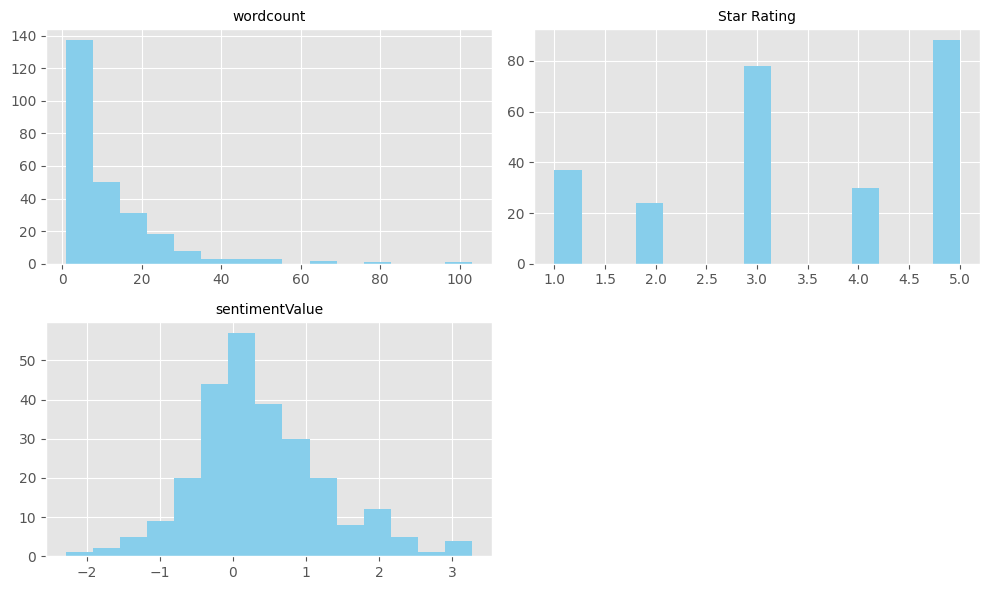

In [9]:
# Eliminamos la columna 'categoria' y creamos un histograma de las demás columnas
axes = dataframe.hist(bins=15, figsize=(10, 6), color='skyblue')  # Cambia 'skyblue' por el color que desees

# Ajustamos el tamaño de los textos del título y de los ejes
for ax in axes.flatten():  # Iteramos sobre todos los ejes
    ax.set_title(ax.get_title(), fontsize=10)  # Cambiar tamaño del título de cada subgráfico
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)  # Cambiar tamaño de la etiqueta del eje X
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Cambiar tamaño de la etiqueta del eje Y

plt.tight_layout()  # Ajusta automáticamente los subgráficos para que se ajuste bien en la figura
plt.show()

#### **⭕️ Análisis de Histogramas**

Se puede apreciar que la distribución de “estrellas” no está balanceada, esto es negativo. Convendría tener las mismas cantidades en las salidas, para no tener resultados “tendenciosos”. Para este ejercicio quedara de este modo pero estos atos deben ser equilibrarlos.
La gráfica de Valores de Sentimientos parece  una campana movida levemente hacia la derecha del cero y la cantidad de palabras se centra sobre todo de 0 a 10.

In [10]:
#Valoraciones de estrellas:
print(dataframe.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


Según la valoración de estrellas y el histograma se confirma que hay sobre todo de 3 y 5 estrellas.

#### **⭕️ Grafica CatPlot `Star Rating`**

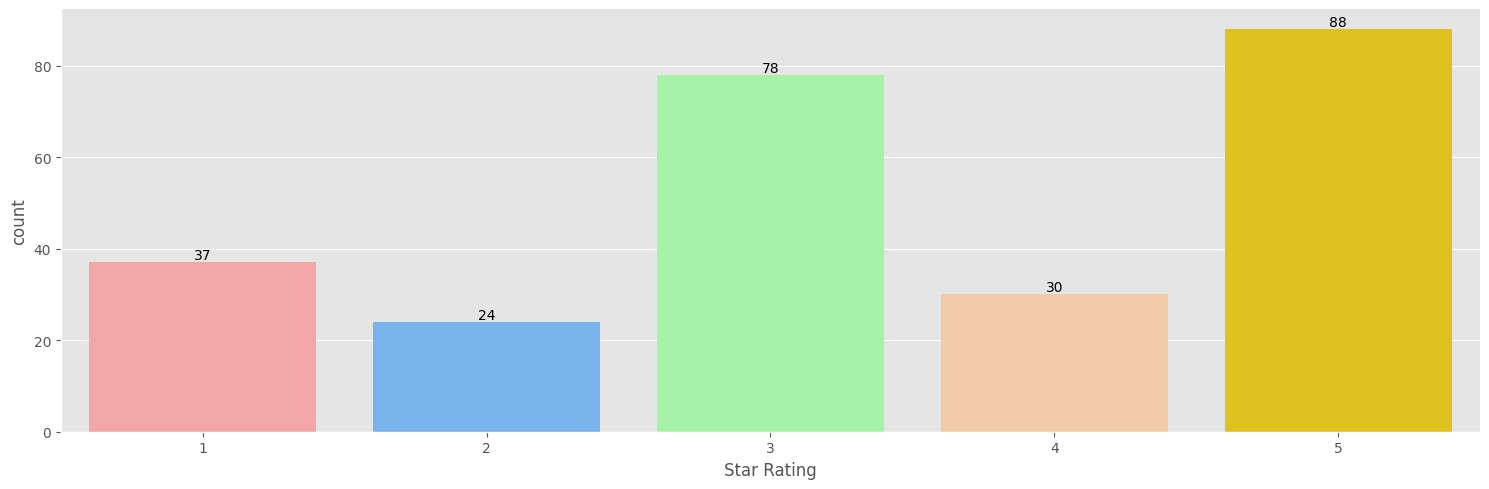

In [16]:
import matplotlib.pyplot as plt

# Define una lista de colores (puedes personalizarla)
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # Ejemplo de 5 colores diferentes

# Crea el gráfico con colores personalizados para cada barra utilizando hue
g = sb.catplot(x='Star Rating', data=dataframe, kind="count", aspect=3, hue='Star Rating', palette=colors, legend=False)

# Itera sobre los ejes y agrega las anotaciones de conteo
for ax in g.axes.flatten():
    # Obtiene los contadores de cada barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()  # Muestra el gráfico

El gráfico de barras muestra la distribución de las calificaciones de estrellas (Star Rating) en un conjunto de datos, revelando que la mayoría de los registros se agrupan en 3 y 5 estrellas, con 78 y 88 respectivamente, lo que indica una fuerte satisfacción general entre los evaluadores. Sin embargo, las calificaciones de 1 y 2 estrellas son significativamente más bajas (37 y 24 registros), sugiriendo que, aunque hay algunas insatisfacciones, estas son menos comunes. Este patrón sugiere que, aunque muchos usuarios están muy satisfechos, es importante investigar las causas de las calificaciones bajas para mejorar la experiencia del cliente.

#### **⭕️ Grafica Factor Plot `wordcount`**

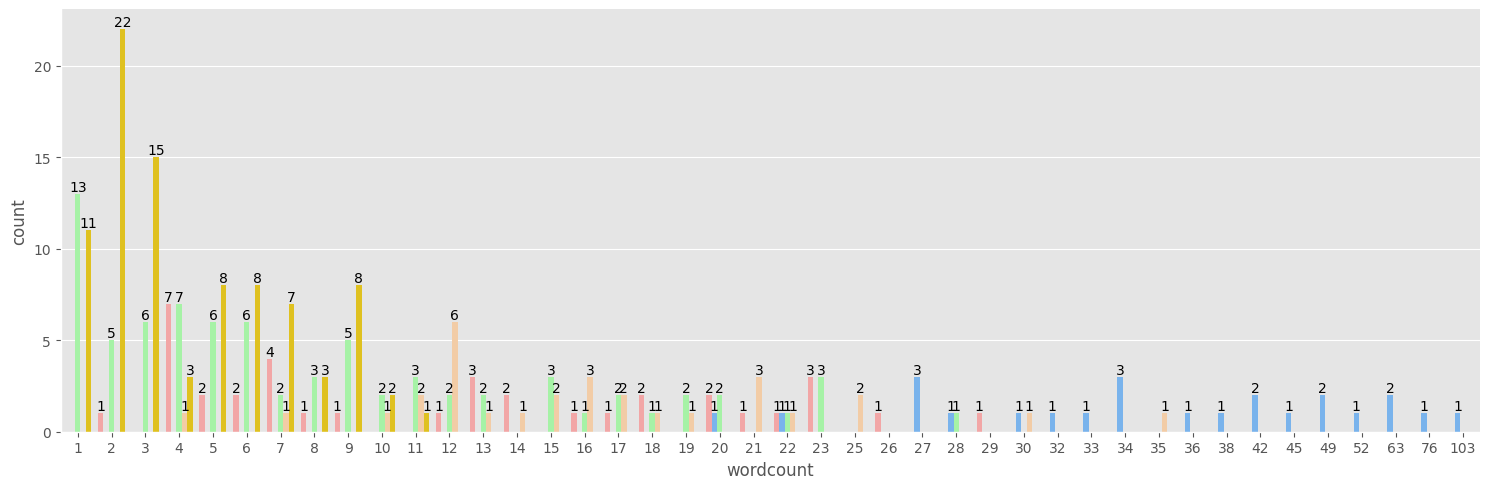

In [25]:
import matplotlib.pyplot as plt

# Define una lista de colores (puedes personalizarla)
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # Ejemplo de 5 colores diferentes

# Crea el gráfico con colores personalizados para cada barra utilizando hue
g = sb.catplot(x='wordcount', data=dataframe, kind="count", aspect=3, hue='Star Rating', palette=colors, legend=False)

# Itera sobre los ejes y agrega las anotaciones de conteo
for ax in g.axes.flatten():
    # Obtiene los contadores de cada barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()  # Muestra el gráfico

#### **⭕️ Preparación de entradas**

Creación de X e y de entrada y los sets de entrenamiento y test.

In [28]:
# Extrae las características (features) 'wordcount' y 'sentimentValue' del DataFrame como una matriz de valores
X = dataframe[['wordcount', 'sentimentValue']].values

# Extrae la variable objetivo (target) 'Star Rating' del DataFrame como un array de valores
y = dataframe['Star Rating'].values

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
# X_train y y_train son para el entrenamiento, X_test y y_test para la evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Inicializa el escalador MinMaxScaler para normalizar los datos
scaler = MinMaxScaler()

# Ajusta el escalador a los datos de entrenamiento y transforma X_train
X_train = scaler.fit_transform(X_train)

# Aplica la misma transformación a los datos de prueba X_test
X_test = scaler.transform(X_test)

#### **⭕️ Selección del mejor valor de K**

([<matplotlib.axis.XTick at 0x19b1f45bf50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

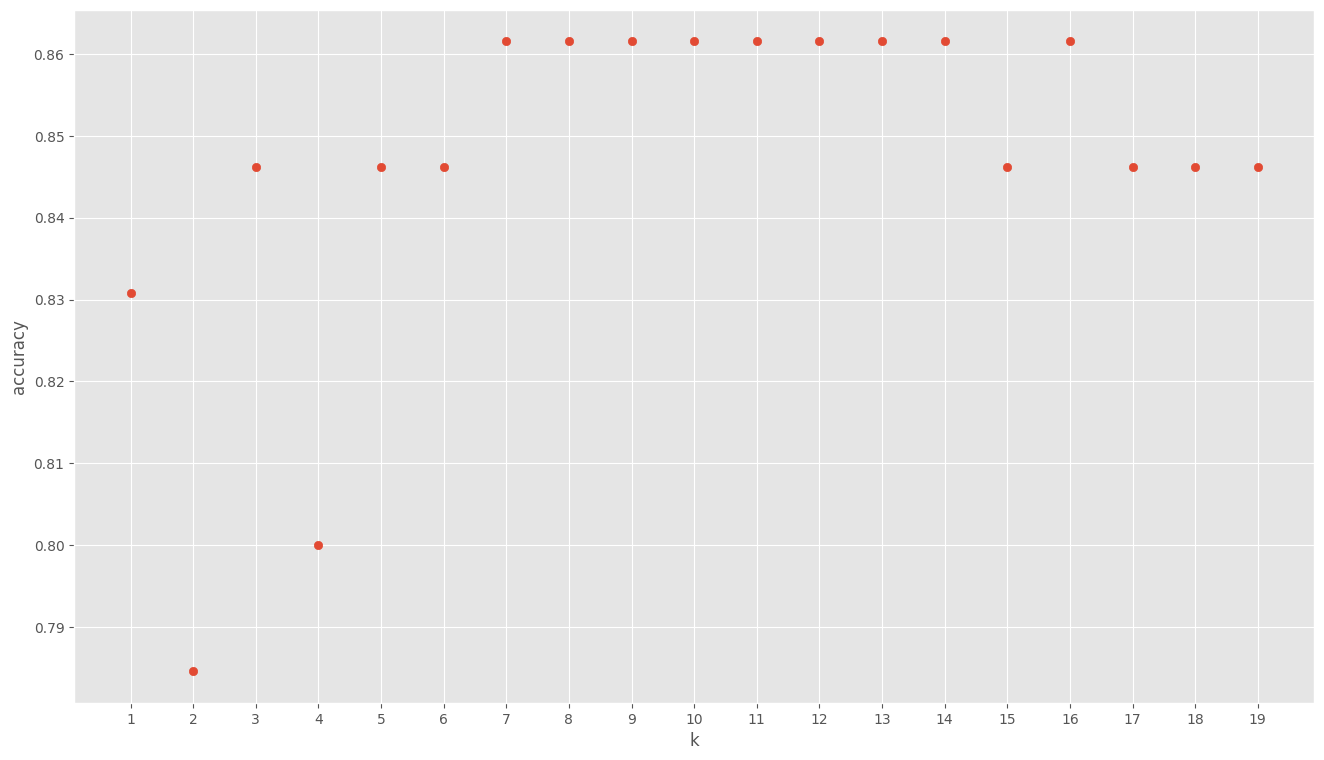

In [39]:
# Define el rango de valores de k a probar, desde 1 hasta 19
k_range = range(1, 20)

# Inicializa una lista para almacenar las puntuaciones de precisión de cada valor de k
scores = []

# Itera sobre cada valor de k en el rango definido
for k in k_range:
    # Crea una instancia del clasificador K-NN con el valor actual de k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Ajusta el clasificador a los datos de entrenamiento
    knn.fit(X_train, y_train)
    
    # Calcula la precisión del clasificador en los datos de prueba y la almacena en la lista scores
    scores.append(knn.score(X_test, y_test))

# Crea una nueva figura para el gráfico
plt.figure()

# Etiqueta el eje x como 'k'
plt.xlabel('k')

# Etiqueta el eje y como 'accuracy'
plt.ylabel('accuracy')

# Crea un gráfico de dispersión con los valores de k en el eje x y las puntuaciones de precisión en el eje y
plt.scatter(k_range, scores)

# Define las marcas en el eje x desde 1 hasta 19, en intervalos de 1
plt.xticks(range(1, 20))  # Cambiado para que el eje x muestre marcas de 1 en 1

En la gráfica se logra notar que con valores k=7 a k=14 es donde mayor precisión se logra.

#### **⭕️ Aplicación de `k-Nearest Neighbor`**

Definimos el valor de k en `7` y creamos nuestro clasificador.

In [33]:
# Establece el número de vecinos a considerar para el clasificador K-NN
n_neighbors = 7

# Crea una instancia del clasificador K-NN con el número especificado de vecinos
knn = KNeighborsClassifier(n_neighbors)

# Ajusta el clasificador K-NN a los datos de entrenamiento
# Esto implica aprender la relación entre las características y la variable objetivo
knn.fit(X_train, y_train)

# Calcula y muestra la precisión (accuracy) del clasificador en el conjunto de entrenamiento
# knn.score() devuelve la proporción de predicciones correctas
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))

# Calcula y muestra la precisión (accuracy) del clasificador en el conjunto de prueba
# Esto permite evaluar el rendimiento del modelo en datos no vistos
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


La precisión que nos da es de `90%` en el set de entrenamiento y del `86%` para el de test.
NOTA: Se utilizo la clase `KNeighborsClassifier` de SciKit Learn puesto que las etiquetas son valores discretos (estrellas del 1 al 5). Pero también existe la clase `KneighborsRegressor` para etiquetas con valores continuos.

#### **⭕️ Precisión del Modelo**

La precisión es confirmada viendo la Matrix de Confusión y el Reporte sobre el conjunto de test, que nos detalla los aciertos y fallos:

In [34]:
# Realiza predicciones sobre el conjunto de prueba utilizando el modelo K-NN entrenado
pred = knn.predict(X_test)

# Imprime la matriz de confusión para evaluar el rendimiento del clasificador
# La matriz muestra el número de predicciones correctas e incorrectas por clase
print(confusion_matrix(y_test, pred))

# Imprime el informe de clasificación que incluye métricas como precisión, recall y f1-score
# Esto proporciona una visión detallada del rendimiento del modelo en cada clase
print(classification_report(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



Nota: Cómo se ve la puntuación F1 es del 87%, bastante buena.

#### **⭕️ Gráfica para visualizar clasificación otenida**

Se realiza la grafica con la clasificación obtenida, la que ayudara a ver fácilmente en donde caerán las predicciones.
NOTA: al ser 2 features, podemos hacer la gráfica 2D y si fueran 3 podría ser en 3D.

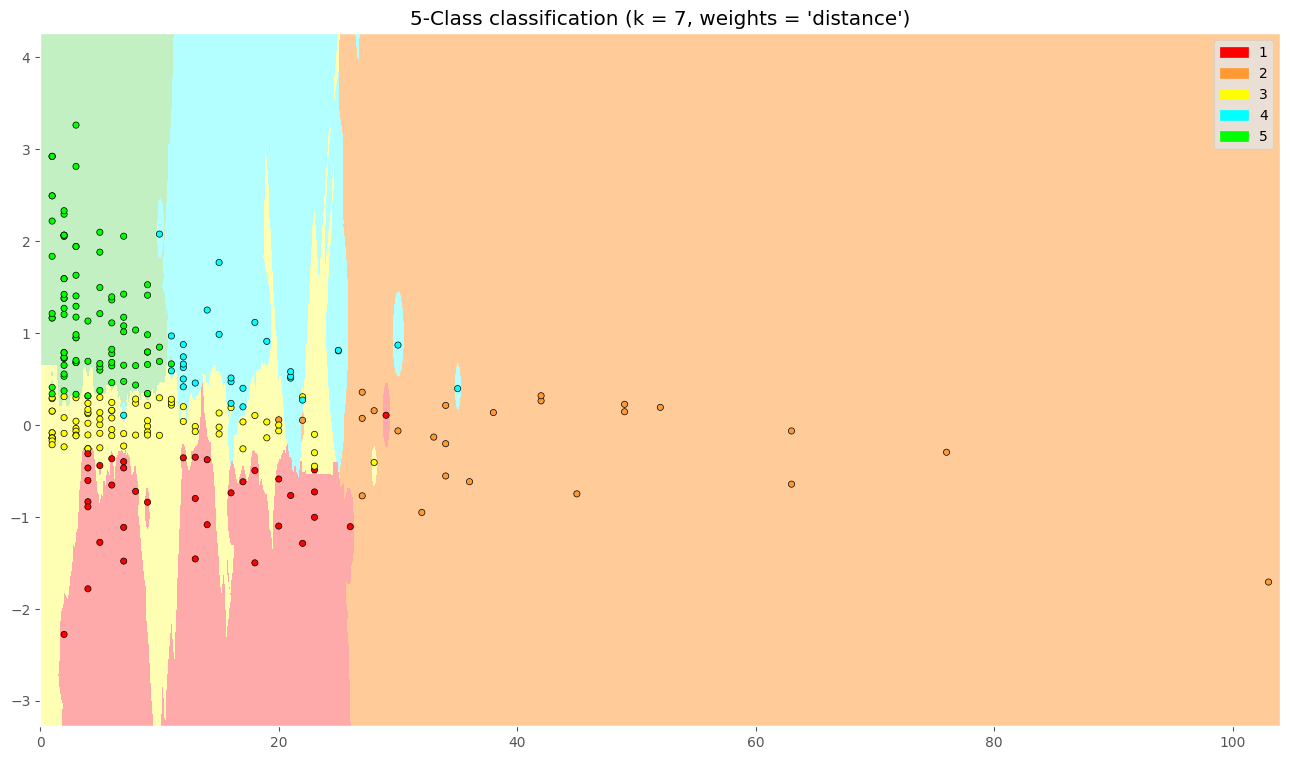

In [37]:
# Define el tamaño del paso en la malla para crear la visualización
h = .02  # tamaño del paso en la malla

# Crea mapas de colores para la visualización
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3', '#b3ffff', '#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933', '#FFFF00', '#00ffff', '#00FF00'])

# Crea una instancia del clasificador K-NN con pesos basados en la distancia y ajusta los datos
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Establece los límites del gráfico basados en los valores mínimo y máximo de las características
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # límites para el eje x
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # límites para el eje y

# Crea una malla de puntos en el rango de los límites establecidos
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Realiza predicciones en cada punto de la malla utilizando el clasificador
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape Z para que tenga la misma forma que xx, facilitando la visualización
Z = Z.reshape(xx.shape)

# Crea una figura para la visualización
plt.figure()

# Crea un gráfico de color que representa las predicciones del clasificador en la malla
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plotea también los puntos de entrenamiento sobre el gráfico
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

# Establece los límites de los ejes x e y
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Crea y añade una leyenda para las diferentes clases
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3, patch4], loc='upper right')

# Establece el título del gráfico, mostrando el número de vecinos y el método de pesos
plt.title("5-Class classification (k = %i, weights = '%s')" % (n_neighbors, 'distance'))

# Muestra el gráfico
plt.show()

Se visualizan  5 zonas en las que se relacionan cantidad de palabras con el valor de sentimiento de la Review que deja el usuario. Se distinguen 5 regiones:
- puntos rojos
- puntos amarillos
- puntos naranjas
- puntos celestes
- puntos verdes

Una review de 20 palabras y Sentimiento 1, nos daría una valoración de 4 (zona celeste).
Con estas zonas podemos intuir ciertas características de los usuarios que usan y valoran la app:
- Los usuarios que ponen 1 estrella tienen sentimiento negativo y hasta 25 palabras.
- Los usuarios que ponen 2 estrellas dan muchas explicaciones (hasta 100 palabras) y su sentimiento puede variar entre negativo y algo positivo.
- Los usuarios que ponen 3 estrellas son bastante neutrales en sentimientos, puesto que están en torno al cero y hasta unas 25 palabras.
- Los usuarios que dan 5 estrellas son bastante positivos (de 0,5 en adelante, aproximadamente) y ponen pocas palabras (hasta 10).

#### **⭕️ ¿Clasificar ó Predecir nuevas muestras?**

Ya se tiene el modelo y el valor de k. logicamente lo ideal será usarlo! Pero si llegan nuevas reviews! ¿Como predecir las estrellas? existen de 2 maneras:

In [40]:
print(clf.predict([[5, 1.0]]))

[5]


Este resultado indica que para 5 palabras y sentimiento 1 valorarán la app con 5 estrellas.

Pero también podríamos obtener las probabilidades que de nos den 1, 2,3,4 o 5 estrellas con `predict_proba()`:

In [42]:
print(clf.predict_proba([[20, 0.0]]))

[[0.00381998 0.02520212 0.97097789 0.         0.        ]]


Aquí se aprecia que para las coordenadas `(20, 0.0)` hay `97%` probabilidades que nos den 3 estrellas. Se puede comprobar en el gráfico pcolormesh, que esta información encaja en las zonas que delimitamos anteriormente (Zona puntos amarillos).